In [446]:
import pandas as pd
import numpy as np

In [447]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [448]:
from datetime import datetime, timedelta
from dateutil import relativedelta

In [449]:
import string

In [450]:
from operator import itemgetter, attrgetter

In [451]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.text import Text 
from nltk.collocations import *
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

In [452]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('vader_lexicon')
#nltk.download('tagsets')

In [453]:
#nltk.download('vader_lexicon')

In [454]:
df = pd.read_csv("Smoke_House_Google_Reviews.csv")

In [455]:
df.columns

Index(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews_per_score', 'reviews', 'rating', 'review_id',
       'author_link', 'author_title', 'author_id', 'author_image',
       'review_text', 'review_img_url', 'owner_answer',
       'owner_answer_timestamp', 'owner_answer_timestamp_datetime_utc',
       'review_link', 'review_rating', 'review_timestamp',
       'review_datetime_utc', 'review_likes', 'reviews_id'],
      dtype='object')

In [456]:
df.drop(['query', 'name', 'google_id', 'place_id', 'location_link',\
       'reviews_link', 'reviews_per_score', 'reviews','rating', 'review_id',\
       'author_link', 'author_title', 'author_id', 'author_image',\
        'review_img_url', 'owner_answer',\
       'owner_answer_timestamp', 'owner_answer_timestamp_datetime_utc',\
       'review_link', 'review_timestamp',\
       'review_datetime_utc', 'review_likes', 'reviews_id'],axis=1,inplace=True)

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_text    1143 non-null   object
 1   review_rating  1722 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.0+ KB


In [458]:
df['text_yn'] = df['review_text'].apply(lambda x: 'no' if x!=x else 'yes')
print(df['text_yn'].value_counts())


yes    1143
no      579
Name: text_yn, dtype: int64


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_text    1143 non-null   object
 1   review_rating  1722 non-null   int64 
 2   text_yn        1722 non-null   object
dtypes: int64(1), object(2)
memory usage: 40.5+ KB


In [460]:
df[df['text_yn']=='yes']['review_text'].isna().value_counts()

False    1143
Name: review_text, dtype: int64

In [461]:
df.head()

,review_text,review_rating,text_yn
0,(Translated by Google) As always a 10 for this...,5,yes
1,Delicioso todo.. seguramente repetiremos para ...,5,yes
2,"Great restaurant, great food, good price, slow...",4,yes
3,"Está demasiado bueno la calidad es increíble, ...",5,yes
4,(Translated by Google) American food restauran...,5,yes


In [462]:
df = df[df['text_yn']=='yes']
df = pd.DataFrame(df[['review_text','review_rating']])
df.reset_index(inplace=True)

In [463]:
df.isna().value_counts()

index  review_text  review_rating
False  False        False            1143
dtype: int64

In [464]:
df.head()

,index,review_text,review_rating
0,0,(Translated by Google) As always a 10 for this...,5
1,1,Delicioso todo.. seguramente repetiremos para ...,5
2,2,"Great restaurant, great food, good price, slow...",4
3,3,"Está demasiado bueno la calidad es increíble, ...",5
4,4,(Translated by Google) American food restauran...,5


In [465]:
df.iloc[0]

index                                                            0
review_text      (Translated by Google) As always a 10 for this...
review_rating                                                    5
Name: 0, dtype: object

In [466]:
def remove_punc(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = [word.lower() for word in nopunc.split()]
    return [word for word in nopunc if word.lower() not in stopwords.words('english')]

df['clean_text'] = df['review_text'].apply(remove_punc)

In [467]:
def google_cleaner(split_review):
    for string in ['translated','google']:
        while string in split_review:
            split_review.remove(string)
            
df['clean_text'].apply(google_cleaner)

0       None
1       None
2       None
3       None
4       None
        ... 
1138    None
1139    None
1140    None
1141    None
1142    None
Name: clean_text, Length: 1143, dtype: object

In [468]:
def google_cleaner2(split_review):
    while 'original' in split_review:
        split_review.index('original')
        del split_review[split_review.index('original'):]
            
df['clean_text'].apply(google_cleaner2)  

0       None
1       None
2       None
3       None
4       None
        ... 
1138    None
1139    None
1140    None
1141    None
1142    None
Name: clean_text, Length: 1143, dtype: object

In [469]:
df['clean_text']

0       [always, 10, site, love, go, eat, good, hambur...
1       [delicioso, todo, seguramente, repetiremos, pa...
2       [great, restaurant, great, food, good, price, ...
3       [está, demasiado, bueno, la, calidad, es, incr...
4       [american, food, restaurant, smoked, meats, al...
                              ...                        
1138    [today, found, novelty, paradise, carnivores, ...
1139                                             [brutal]
1140    [awesome, food, delicious, ribs, decelerated, ...
1141                           [carnaca, good, yipikayei]
1142    [cozy, atmosphere, correct, service, average, ...
Name: clean_text, Length: 1143, dtype: object

In [470]:
df['clean_text_joined'] = df['clean_text'].apply(lambda x: ' '.join(x))

In [471]:
df

,index,review_text,review_rating,clean_text,clean_text_joined
0,0,(Translated by Google) As always a 10 for this...,5,"[always, 10, site, love, go, eat, good, hambur...",always 10 site love go eat good hamburger well...
1,1,Delicioso todo.. seguramente repetiremos para ...,5,"[delicioso, todo, seguramente, repetiremos, pa...",delicioso todo seguramente repetiremos para pr...
2,2,"Great restaurant, great food, good price, slow...",4,"[great, restaurant, great, food, good, price, ...",great restaurant great food good price slow se...
3,3,"Está demasiado bueno la calidad es increíble, ...",5,"[está, demasiado, bueno, la, calidad, es, incr...",está demasiado bueno la calidad es increíble v...
4,4,(Translated by Google) American food restauran...,5,"[american, food, restaurant, smoked, meats, al...",american food restaurant smoked meats already ...
...,...,...,...,...,...
1138,1716,(Translated by Google) Today we have found thi...,4,"[today, found, novelty, paradise, carnivores, ...",today found novelty paradise carnivores treatm...
1139,1717,Brutal!!!!,5,[brutal],brutal
1140,1719,"(Translated by Google) Awesome food, delicious...",5,"[awesome, food, delicious, ribs, decelerated, ...",awesome food delicious ribs decelerated mouth ...
1141,1720,"(Translated by Google) Carnaca good, yipikayei...",5,"[carnaca, good, yipikayei]",carnaca good yipikayei


In [472]:
df['rev_length'] = df['clean_text'].apply(lambda x: len(x))
df['rev_length'].describe()

count    1143.000000
mean       16.538058
std        18.761245
min         0.000000
25%         5.000000
50%        11.000000
75%        21.000000
max       304.000000
Name: rev_length, dtype: float64

In [473]:
df.head()

,index,review_text,review_rating,clean_text,clean_text_joined,rev_length
0,0,(Translated by Google) As always a 10 for this...,5,"[always, 10, site, love, go, eat, good, hambur...",always 10 site love go eat good hamburger well...,22
1,1,Delicioso todo.. seguramente repetiremos para ...,5,"[delicioso, todo, seguramente, repetiremos, pa...",delicioso todo seguramente repetiremos para pr...,7
2,2,"Great restaurant, great food, good price, slow...",4,"[great, restaurant, great, food, good, price, ...",great restaurant great food good price slow se...,8
3,3,"Está demasiado bueno la calidad es increíble, ...",5,"[está, demasiado, bueno, la, calidad, es, incr...",está demasiado bueno la calidad es increíble v...,8
4,4,(Translated by Google) American food restauran...,5,"[american, food, restaurant, smoked, meats, al...",american food restaurant smoked meats already ...,51


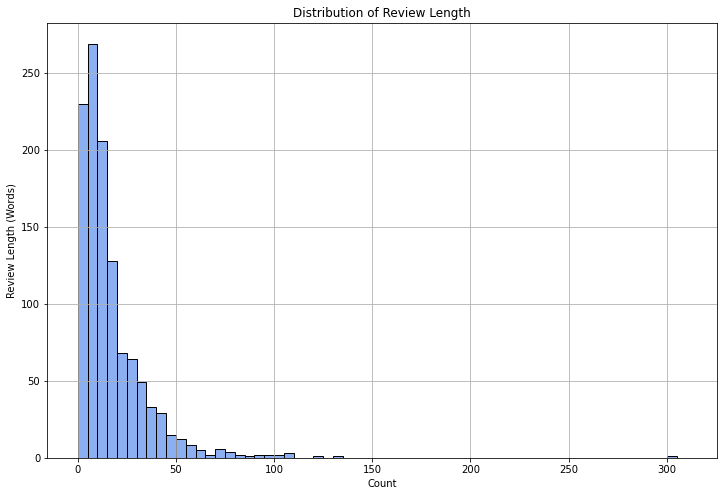

In [474]:
plt.figure(figsize=(12,8))
plt.grid(True)
fig = sns.histplot(data=df,x='rev_length',binrange=(0,310),binwidth=5,color='cornflowerblue')
fig.set_title('Distribution of Review Length', fontsize=12)
fig.set_xlabel('Count')
fig.set_ylabel('Review Length (Words)')
plt.savefig('Pics/review_length.jpg',bbox_inches='tight',dpi=200)

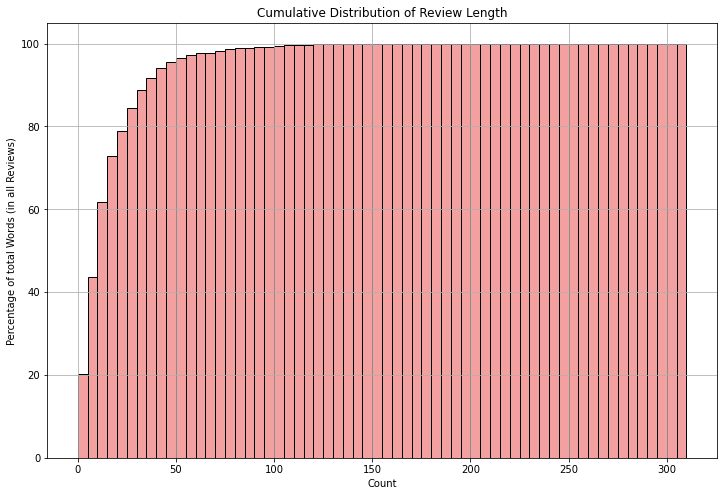

In [475]:
plt.figure(figsize=(12,8))
plt.grid(True)
fig = sns.histplot(data=df,x='rev_length',binrange=(0,310),binwidth=5,cumulative=True,stat='percent',color='lightcoral')
fig.set_title('Cumulative Distribution of Review Length', fontsize=12)
fig.set_xlabel('Count')
fig.set_ylabel('Percentage of total Words (in all Reviews)')
plt.savefig('Pics/review_length_cum.jpg',bbox_inches='tight',dpi=200)

In [476]:
nltk_tags = df['clean_text'].apply(lambda x: nltk.pos_tag(x))
nltk_tags

0       [(always, RB), (10, CD), (site, NN), (love, NN...
1       [(delicioso, NN), (todo, NN), (seguramente, NN...
2       [(great, JJ), (restaurant, NN), (great, JJ), (...
3       [(está, NN), (demasiado, NN), (bueno, NN), (la...
4       [(american, JJ), (food, NN), (restaurant, NN),...
                              ...                        
1138    [(today, NN), (found, VBD), (novelty, RB), (pa...
1139                                       [(brutal, NN)]
1140    [(awesome, JJ), (food, NN), (delicious, JJ), (...
1141         [(carnaca, NN), (good, JJ), (yipikayei, NN)]
1142    [(cozy, NN), (atmosphere, RB), (correct, JJ), ...
Name: clean_text, Length: 1143, dtype: object

In [477]:
lemmatizer = WordNetLemmatizer() 
lemmatizer.lemmatize('eating','v')

'eat'

In [478]:
#nltk.help.upenn_tagset()

In [479]:
def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        #print(f'{nltk_tag} das wäre jetzt weg')
        return None
    
print(nltk_pos_tagger(nltk_tags.iloc[0][2][1]))

n


In [480]:
"""def review_lemmatizer(review_tagged):
    lemmatizer = WordNetLemmatizer() 
    lemmatized_reviews = []
    for rtuple in review_tagged:
        wordnet_tagged = (rtuple[0],nltk_pos_tagger(rtuple[1]))
        if wordnet_tagged[1] is not None:
            lemmatized_reviews.append(lemmatizer.lemmatize(rtuple[0],wordnet_tagged[1]))
            
    return lemmatized_reviews"""

'def review_lemmatizer(review_tagged):\n    lemmatizer = WordNetLemmatizer() \n    lemmatized_reviews = []\n    for rtuple in review_tagged:\n        wordnet_tagged = (rtuple[0],nltk_pos_tagger(rtuple[1]))\n        if wordnet_tagged[1] is not None:\n            lemmatized_reviews.append(lemmatizer.lemmatize(rtuple[0],wordnet_tagged[1]))\n            \n    return lemmatized_reviews'

In [481]:
def review_lemmatizer(review_tagged):
    lemmatizer = WordNetLemmatizer() 
    lemmatized_reviews = []
    for rtuple in review_tagged:
        wordnet_tagged = (rtuple[0],nltk_pos_tagger(rtuple[1]))
        if wordnet_tagged[1] is None:
            lemmatized_reviews.append(wordnet_tagged[0])
        else:
            lemmatized_reviews.append(lemmatizer.lemmatize(rtuple[0],wordnet_tagged[1]))
    return lemmatized_reviews

In [482]:
df['lemmatized_reviews'] = list(map(review_lemmatizer, nltk_tags))

In [483]:
df['lemmatized_reviews_joined'] = df['lemmatized_reviews'].apply(lambda x: ' '.join(x))

In [484]:
df

,index,review_text,review_rating,clean_text,clean_text_joined,rev_length,lemmatized_reviews,lemmatized_reviews_joined
0,0,(Translated by Google) As always a 10 for this...,5,"[always, 10, site, love, go, eat, good, hambur...",always 10 site love go eat good hamburger well...,22,"[always, 10, site, love, go, eat, good, hambur...",always 10 site love go eat good hamburger well...
1,1,Delicioso todo.. seguramente repetiremos para ...,5,"[delicioso, todo, seguramente, repetiremos, pa...",delicioso todo seguramente repetiremos para pr...,7,"[delicioso, todo, seguramente, repetiremos, pa...",delicioso todo seguramente repetiremos para pr...
2,2,"Great restaurant, great food, good price, slow...",4,"[great, restaurant, great, food, good, price, ...",great restaurant great food good price slow se...,8,"[great, restaurant, great, food, good, price, ...",great restaurant great food good price slow se...
3,3,"Está demasiado bueno la calidad es increíble, ...",5,"[está, demasiado, bueno, la, calidad, es, incr...",está demasiado bueno la calidad es increíble v...,8,"[está, demasiado, bueno, la, calidad, e, incre...",está demasiado bueno la calidad e increíble vo...
4,4,(Translated by Google) American food restauran...,5,"[american, food, restaurant, smoked, meats, al...",american food restaurant smoked meats already ...,51,"[american, food, restaurant, smoke, meat, alre...",american food restaurant smoke meat already se...
...,...,...,...,...,...,...,...,...
1138,1716,(Translated by Google) Today we have found thi...,4,"[today, found, novelty, paradise, carnivores, ...",today found novelty paradise carnivores treatm...,74,"[today, find, novelty, paradise, carnivore, tr...",today find novelty paradise carnivore treatmen...
1139,1717,Brutal!!!!,5,[brutal],brutal,1,[brutal],brutal
1140,1719,"(Translated by Google) Awesome food, delicious...",5,"[awesome, food, delicious, ribs, decelerated, ...",awesome food delicious ribs decelerated mouth ...,14,"[awesome, food, delicious, rib, decelerate, mo...",awesome food delicious rib decelerate mouth li...
1141,1720,"(Translated by Google) Carnaca good, yipikayei...",5,"[carnaca, good, yipikayei]",carnaca good yipikayei,3,"[carnaca, good, yipikayei]",carnaca good yipikayei


In [485]:
all_reviews_lemmatized_joined = ' '.join(df['lemmatized_reviews_joined'])
all_reviews_lemmatized_joined_good = ' '.join(df[df['review_rating']>=4]['lemmatized_reviews_joined'])
all_reviews_lemmatized_joined_bad = ' '.join(df[df['review_rating']<=2]['lemmatized_reviews_joined'])

In [486]:
all_reviews_lemmatized_tokenized = word_tokenize(all_reviews_lemmatized_joined)
all_reviews_lemmatized_tokenized_good = word_tokenize(all_reviews_lemmatized_joined_good)
all_reviews_lemmatized_tokenized_bad = word_tokenize(all_reviews_lemmatized_joined_bad)

In [487]:
fdist = FreqDist(all_reviews_lemmatized_tokenized)
fdist_good = FreqDist(all_reviews_lemmatized_tokenized_good)
fdist_bad = FreqDist(all_reviews_lemmatized_tokenized_bad)

In [488]:
fdist.most_common()[0][1]

626

In [489]:
most_common = fdist_good.most_common(50)
words = []
counts = []

for ttuple in most_common:
    (word,count) = ttuple
    words.append(word)
    counts.append(count)

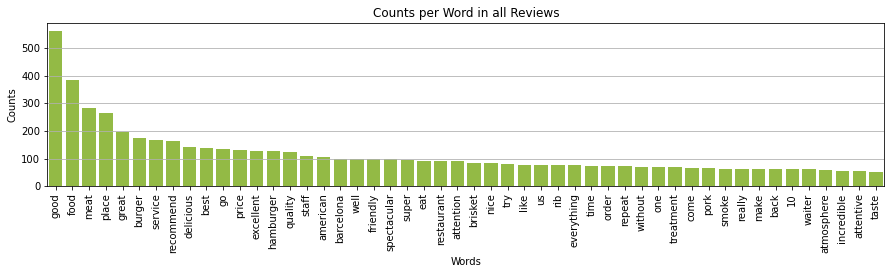

In [490]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
plt.grid(True)
fig = sns.barplot(x=words,y=counts,color='yellowgreen')
fig.set_title('Counts per Word in all Reviews', fontsize=12)
fig.set_xlabel('Words')
fig.set_ylabel('Counts')
plt.savefig('Pics/word_counts.jpg',bbox_inches='tight',dpi=200)

In [491]:
fdist_bad.most_common(10)

[('food', 66),
 ('bad', 39),
 ('us', 32),
 ('meat', 31),
 ('go', 29),
 ('service', 26),
 ('time', 25),
 ('good', 24),
 ('like', 23),
 ('serve', 22)]

In [492]:
Text(all_reviews_lemmatized_tokenized).similar("food")

service price meat hamburger burger place quality excellent atmosphere
attention people good restaurant everything super treatment rib staff
quantity recommend


In [493]:
Text(all_reviews_lemmatized_tokenized).similar("service")

food quality price good treatment hamburger meat burger attention
atmosphere taste staff great delicious quantity waiter place excellent
american rib


In [494]:
Text(all_reviews_lemmatized_tokenized).concordance('good')

Displaying 25 of 626 matches:
always 10 site love go eat good hamburger well do point like wonder 
obar más great restaurant great food good price slow service está demasiado bu
recommend go hungry attention waiter good hope return soon continue try thing 
 return soon continue try thing menu good waffle burger meat lot flavor lotus 
 flavor lotus dessert make fall love good burger good service place good atmos
s dessert make fall love good burger good service place good atmosphere center
 love good burger good service place good atmosphere center barcelona price bi
py unbeatable attention fast service good quality meat cook perfection good ga
ce good quality meat cook perfection good garnish spectacular come dinner food
ty chicken wing spicy barbecue sauce good hamburger give 4 star macncheese ord
tick come london couldnt stay desire good quantity reasonable price nacho addi
put brioche bun melt mouth attention good especially waiter bit old seem like 
amburger eat barcelona ​​the ser

In [495]:
Text(all_reviews_lemmatized_tokenized).concordance('bad')

Displaying 25 of 61 matches:
good saturday meat burger look pretty bad whitish could tell wasnt black angus 
ood food quantity price truth nothing bad good location well couldnt put anythi
area coke gas burn steak disgust chip bad quality meat 70 fat good food friendl
t flavor variety potato good 👍👍 doubt bad comment nothing attentive staff good 
t doubt congratulation whole team 🥳🥳🥳 bad service lovely food great service tas
r load refrigerator 830 pm night seem bad management cold water time fair atten
0 spectacular flavor food drink quite bad price expensive mandatory bbq nachos 
disappointment tiny amount zero taste bad soft drink ive ever life mixture wate
sh hand leave want fair say attention bad make sad dont think come back would n
riend finish eat glass pepsi cost 35€ bad service high price good meat go dinne
 doubt 200 recommend repeat good food bad service wrong order waiter run away m
pepsi without bubble idea never write bad review stick incredible treatment foo
d general n

In [496]:
print(Text(all_reviews_lemmatized_tokenized).generate())

Building ngram index...


personality good treatment expect something great disappointment quite
serious starter order ranch combo recommend excellent quality food
nice staf cold pull pork excellent tad pricey mainly due location
would go sure try burger meat dessert atmosphere super well rich food
really amazing tasty good atmosphere eat quietly staff friendly go
hungry attention also incredible woman attend us ten minute enter
order menu continue wait get order dinner also tell us friendly wing
food nothing say bad brisket reheat many part dry lack flavour rib
spicy sause reheat sauce bland little price pay € 35 even refillable
less water price soft
personality good treatment expect something great disappointment quite
serious starter order ranch combo recommend excellent quality food
nice staf cold pull pork excellent tad pricey mainly due location
would go sure try burger meat dessert atmosphere super well rich food
really amazing tasty good atmosphere eat quietly staff friendly go
hungry attention also inc

In [497]:
Text(all_reviews_lemmatized_tokenized).common_contexts(["good", "food"])

good_quality good_good great_atmosphere good_nice staff_really


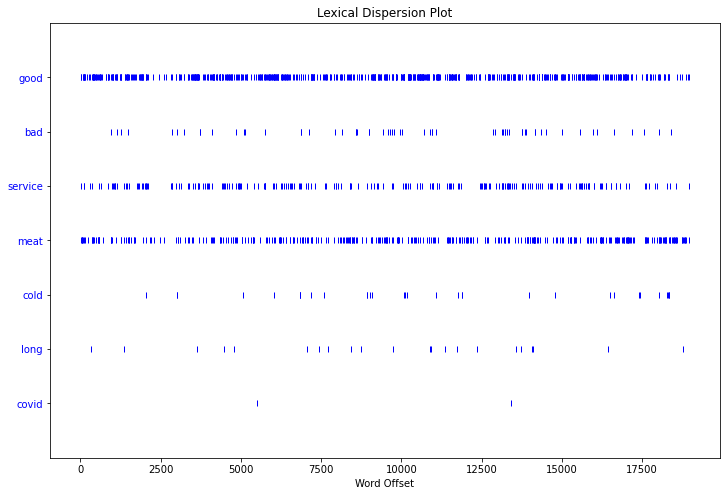

In [498]:
fig=plt.figure(figsize=(12,8))
#fig=Text(all_reviews_lemmatized_tokenized).dispersion_plot(["good", "bad", "service",'meat','cold','long','covid'])
nltk.draw.dispersion.dispersion_plot(Text(all_reviews_lemmatized_tokenized), ["good", "bad", "service",'meat','cold','long','covid'], ignore_case=False, title='Lexical Dispersion Plot')
fig.savefig('Pics/lex_dispersion_plot.jpg',bbox_inches='tight',dpi=200)
plt.show()

In [499]:
finder = BigramCollocationFinder.from_words(Text(all_reviews_lemmatized_tokenized))
finder.ngram_fd.items()

dict_items([(('always', '10'), 2), (('10', 'site'), 1), (('site', 'love'), 1), (('love', 'go'), 2), (('go', 'eat'), 7), (('eat', 'good'), 7), (('good', 'hamburger'), 13), (('hamburger', 'well'), 2), (('well', 'do'), 8), (('do', 'point'), 1), (('point', 'like'), 2), (('like', 'wonder'), 1), (('wonder', 'still'), 1), (('still', 'wait'), 2), (('wait', 'try'), 1), (('try', 'smoke'), 2), (('smoke', 'meat'), 36), (('meat', 'truth'), 2), (('truth', 'faithful'), 1), (('faithful', 'authentic'), 1), (('authentic', 'american'), 7), (('american', 'delicioso'), 1), (('delicioso', 'todo'), 1), (('todo', 'seguramente'), 1), (('seguramente', 'repetiremos'), 1), (('repetiremos', 'para'), 1), (('para', 'probar'), 1), (('probar', 'más'), 1), (('más', 'great'), 1), (('great', 'restaurant'), 1), (('restaurant', 'great'), 1), (('great', 'food'), 23), (('food', 'good'), 38), (('good', 'price'), 17), (('price', 'slow'), 1), (('slow', 'service'), 4), (('service', 'está'), 1), (('está', 'demasiado'), 1), (('dem

In [500]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(Text(all_reviews_lemmatized_tokenized))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20]

[(('good', 'food'), 64),
 (('pull', 'pork'), 61),
 (('without', 'doubt'), 42),
 (('food', 'good'), 38),
 (('highly', 'recommend'), 37),
 (('good', 'service'), 36),
 (('smoke', 'meat'), 36),
 (('good', 'quality'), 31),
 (('come', 'back'), 28),
 (('ive', 'ever'), 27),
 (('food', 'great'), 26),
 (('good', 'place'), 25),
 (('place', 'eat'), 25),
 (('delicious', 'food'), 24),
 (('good', 'attention'), 24),
 (('mac', 'cheese'), 24),
 (('quality', 'meat'), 24),
 (('great', 'food'), 23),
 (('american', 'food'), 21),
 (('american', 'style'), 20)]

In [501]:
def plot_ngram(ngram_tuples,this_fig_name,this_title,this_xlabel,this_ylabel,this_color):
    ngrams = []
    counts = []
    for ttuple in ngram_tuples:
        (ngram,count) = ttuple
        ngram = ' '.join(ngram)
        ngrams.append(ngram)
        counts.append(count)
    
    plt.figure(figsize=(15,3))
    plt.xticks(rotation=90)
    plt.grid(True)
    fig = sns.barplot(x=ngrams,y=counts,color=this_color)
    fig.set_title(this_title, fontsize=12)
    fig.set_xlabel(this_xlabel)
    fig.set_ylabel(this_ylabel)
    plt.savefig(f'Pics/{this_fig_name}.jpg',bbox_inches='tight',dpi=200)
    
    #return ngrams,counts

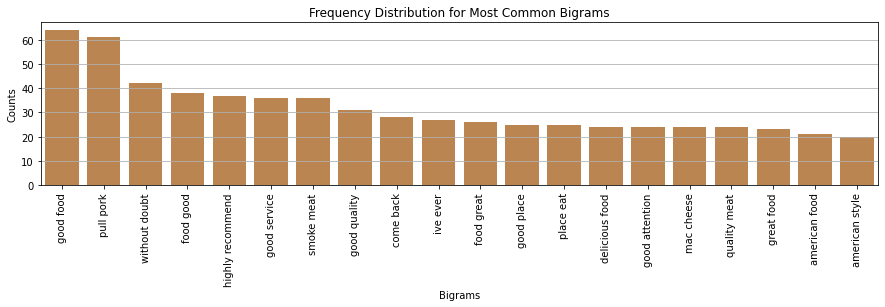

In [502]:
plot_ngram(sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20],\
           'freq_dist_bigrams','Frequency Distribution for Most Common Bigrams','Bigrams','Counts','peru')

In [503]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(Text(all_reviews_lemmatized_tokenized_good))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]

[(('good', 'food'), 61),
 (('pull', 'pork'), 44),
 (('without', 'doubt'), 42),
 (('food', 'good'), 35),
 (('smoke', 'meat'), 35),
 (('highly', 'recommend'), 34),
 (('good', 'service'), 31),
 (('good', 'quality'), 29),
 (('food', 'great'), 26),
 (('ive', 'ever'), 26)]

In [504]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(Text(all_reviews_lemmatized_tokenized_bad))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]

[(('mac', 'cheese'), 8),
 (('bad', 'service'), 7),
 (('come', 'back'), 7),
 (('1', 'hour'), 6),
 (('bring', 'us'), 6),
 (('go', 'back'), 6),
 (('pull', 'pork'), 6),
 (('hour', 'half'), 5),
 (('look', 'like'), 5),
 (('can', 'not'), 4)]

In [505]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(Text(all_reviews_lemmatized_tokenized))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]
#finder.apply_freq_filter(2)
#finder.nbest(trigram_measures.pmi, 20)

[(('return', 'without', 'doubt'), 8),
 (('good', 'food', 'good'), 7),
 (('rib', 'pull', 'pork'), 7),
 (('bacon', 'cheese', 'fry'), 6),
 (('food', 'good', 'service'), 6),
 (('food', 'great', 'service'), 6),
 (('good', 'attention', 'staff'), 6),
 (('good', 'place', 'eat'), 6),
 (('it', '’', 's'), 6),
 (('repeat', 'without', 'doubt'), 6)]

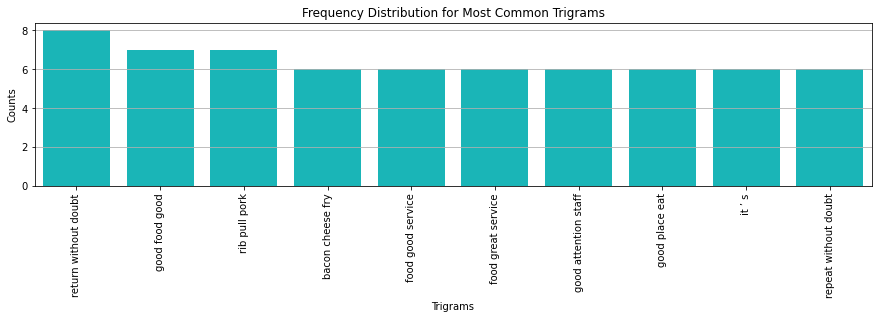

In [506]:
plot_ngram(sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10],'freq_dist_trigrams','Frequency Distribution for Most Common Trigrams','Trigrams','Counts','darkturquoise')

In [507]:
all_reviews_lemmatized_joined = ' '.join(df['lemmatized_reviews_joined'])

In [508]:
sia = SentimentIntensityAnalyzer()
df['sia_clean_text'] = df['lemmatized_reviews'].apply(lambda x: sia.polarity_scores(' '.join(x)))  

In [509]:
print(df['sia_clean_text'].iloc[0])

{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.9423}


In [510]:
df.columns

Index(['index', 'review_text', 'review_rating', 'clean_text',
       'clean_text_joined', 'rev_length', 'lemmatized_reviews',
       'lemmatized_reviews_joined', 'sia_clean_text'],
      dtype='object')

In [511]:
df.drop(['clean_text','clean_text_joined','rev_length'],axis=1,inplace=True)

In [512]:
df['sia_clean_text'].iloc[0]['neg'] < df['sia_clean_text'].iloc[0]['pos']

True

In [513]:
df['compound'] = df['sia_clean_text'].apply(lambda x: x['compound'])
#df['neu'] = df['sia_clean_text'].apply(lambda x: x['neu'])
#df['pos'] = df['sia_clean_text'].apply(lambda x: x['pos'])
#df['neg'] = df['sia_clean_text'].apply(lambda x: x['neg'])

In [514]:
#See https://towardsdatascience.com/social-media-sentiment-analysis-in-python-with-vader-no-training-required-4bc6a21e87b8

def sentiment(sia):
    if sia['compound'] >= 0.05:
            return 'good'
    elif sia['compound'] <= -0.05:
        return 'bad'
    else: return 'neutral'

df['sia_result'] = df['sia_clean_text'].apply(sentiment)

In [515]:
df.head()

,index,review_text,review_rating,lemmatized_reviews,lemmatized_reviews_joined,sia_clean_text,compound,sia_result
0,0,(Translated by Google) As always a 10 for this...,5,"[always, 10, site, love, go, eat, good, hambur...",always 10 site love go eat good hamburger well...,"{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'comp...",0.9423,good
1,1,Delicioso todo.. seguramente repetiremos para ...,5,"[delicioso, todo, seguramente, repetiremos, pa...",delicioso todo seguramente repetiremos para pr...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,2,"Great restaurant, great food, good price, slow...",4,"[great, restaurant, great, food, good, price, ...",great restaurant great food good price slow se...,"{'neg': 0.0, 'neu': 0.311, 'pos': 0.689, 'comp...",0.9022,good
3,3,"Está demasiado bueno la calidad es increíble, ...",5,"[está, demasiado, bueno, la, calidad, e, incre...",está demasiado bueno la calidad e increíble vo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,4,(Translated by Google) American food restauran...,5,"[american, food, restaurant, smoke, meat, alre...",american food restaurant smoke meat already se...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.9570,good


In [516]:
df.groupby('review_rating').mean()

,index,compound
review_rating,,
1,917.898551,-0.143528
2,1031.275000,0.277455
3,849.563380,0.384308
4,856.145078,0.633125
5,806.107792,0.675309


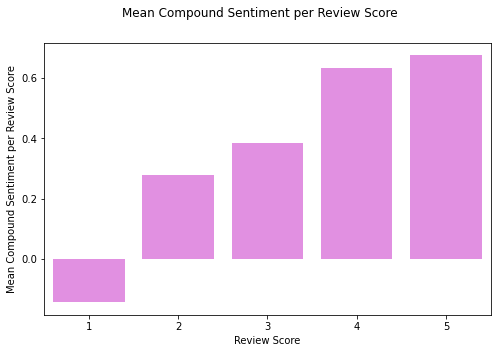

In [526]:
plt.figure(figsize=(8,5))
sns.barplot(x=df.groupby('review_rating').mean().index,y=df.groupby('review_rating').mean()['compound'],color='violet')
plt.suptitle('Mean Compound Sentiment per Review Score', fontsize=12)
plt.xlabel('Review Score')
plt.ylabel('Mean Compound Sentiment per Review Score')
plt.savefig('Pics/sentiment_per_score.jpg',bbox_inches='tight',dpi=200)

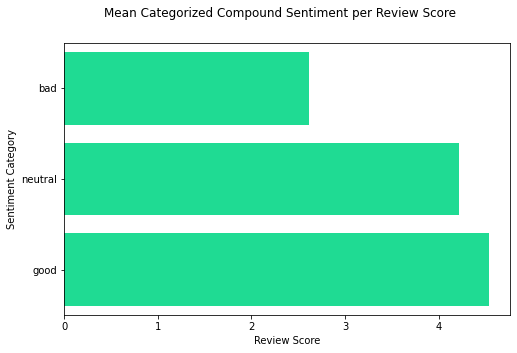

In [527]:
plt.figure(figsize=(8,5))
sns.barplot(y=df.groupby('sia_result').mean()['review_rating'].index,\
            x=df.groupby('sia_result').mean()['review_rating'],\
            order=['bad','neutral','good'],color='mediumspringgreen')
plt.suptitle('Mean Categorized Compound Sentiment per Review Score', fontsize=12)
plt.xlabel('Review Score')
plt.ylabel('Sentiment Category')
plt.savefig('Pics/cat_sentiment_per_score.jpg',bbox_inches='tight',dpi=200)

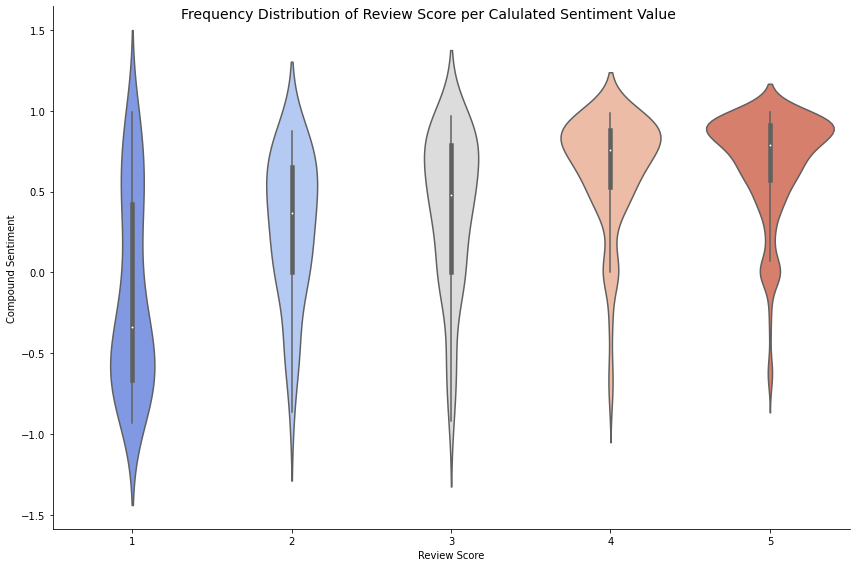

In [531]:
fig = sns.catplot(data=df,x='review_rating',y='compound',kind='violin',height=8, aspect=1.5,palette='coolwarm')
plt.suptitle('Frequency Distribution of Review Score per Calulated Sentiment Value', fontsize=14)
plt.xlabel('Review Score')
plt.ylabel('Compound Sentiment')
plt.savefig('Pics/rev_score_sentiment.jpg',bbox_inches='tight',dpi=200)